# Metadata general information

## 1. General Setup and Importing Data

In [2]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

import qiime2 as q2

%matplotlib inline

In [3]:
metadata = pd.read_csv('data/raw_data/updog_metadata.tsv', sep='\t',index_col=0)

metadata.head()

,subject,country,subsistence_mode,sex,age,bmi
sampleid,,,,,,
ERR2619723,BAN01a,Cameroon,Farmer,M,62,22.348799
ERR2619724,BAN02a,Cameroon,Farmer,M,65,20.108957
ERR2619725,BAN03a,Cameroon,Farmer,M,58,20.549887
ERR2619726,BAN05a,Cameroon,Farmer,M,78,20.923472
ERR2619727,BAN07a,Cameroon,Farmer,F,56,26.978782


## 2. Metadata overview
### 2.1. Country distribution per lifestyle

In [17]:
country_distribution = metadata.groupby(by= ['country' ])

country_distribution = country_distribution.size()

country_distribution

country
Cameroon    57
Italy       10
Peru        18
Tanzania    22
USA         19
dtype: int64

<Axes: title={'center': 'Frequency of samples per lifestyle'}, xlabel='Lifestyle', ylabel='Sample Counts'>

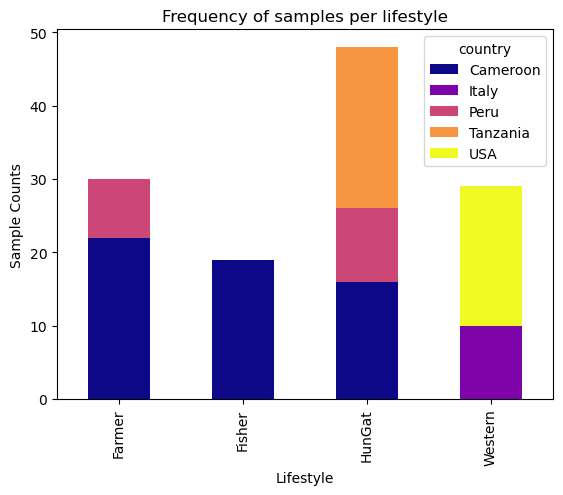

In [29]:
country_lifestyle = metadata.groupby(by= ['subsistence_mode', 'country' ])

country_lifestyle = country_lifestyle.size()

#dataframe with countries as columns and lifestyle as rows
country_lifestyle_df = country_lifestyle.unstack(fill_value=0)

country_lifestyle_df.plot.bar(ylabel = 'Sample Counts', 
                      xlabel = 'Lifestyle', 
                      title='Frequency of samples per lifestyle',
                      cmap = 'plasma',        
                     stacked=True)

### 2.2. Sex distribution per Lifestyle

In [16]:
sex_distribution = metadata.groupby(by= ['sex'])
sex_distribution = sex_distribution.size()
sex_distribution

sex
F    61
M    65
dtype: int64

<Axes: title={'center': 'Frequency of samples per lifestyle'}, xlabel='Lifestyle', ylabel='Sample Counts'>

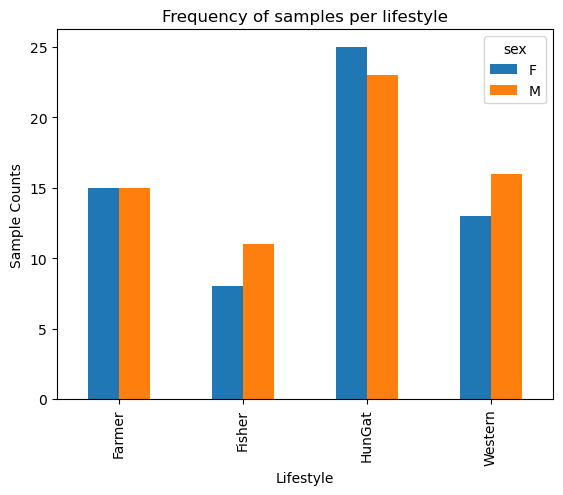

In [5]:
sex_lifestyle = metadata.groupby(by= ['subsistence_mode', 'sex' ])

sex_lifestyle = sex_lifestyle.size()

#dataframe with countries as columns and lifestyle as rows
sex_lifestyle_df = sex_lifestyle.unstack(fill_value=0)

sex_lifestyle_df.plot.bar(ylabel = 'Sample Counts', 
                      xlabel = 'Lifestyle', 
                      title='Frequency of samples per lifestyle',
                     )

### Age distribution

<Axes: xlabel='Age', ylabel='Sample Count'>

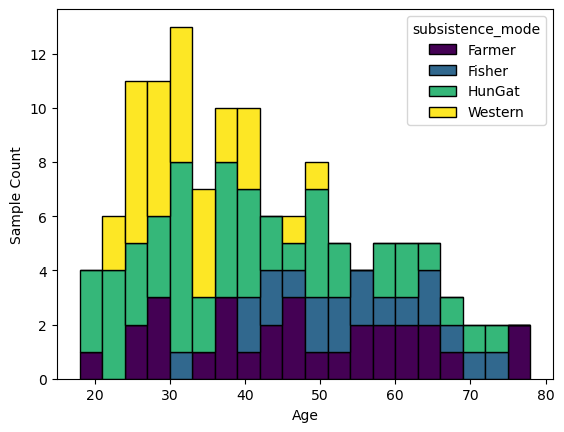

In [27]:
#Remove ages above 150
metadata_filtered = metadata[metadata['age'] <= 150]

#Pivot so each subsistence_mode is a column
ages_wide = metadata_filtered.pivot(columns='subsistence_mode', values='age')

#Plot stacked histogram
ages_wide.plot.hist(stacked=True, bins=20, edgecolor='black', 
                    ylabel= 'Sample Count' , xlabel = 'Age',
                   cmap = 'viridis')

### 2.4 BMI distribution

<Axes: xlabel='BMI', ylabel='Sample Count'>

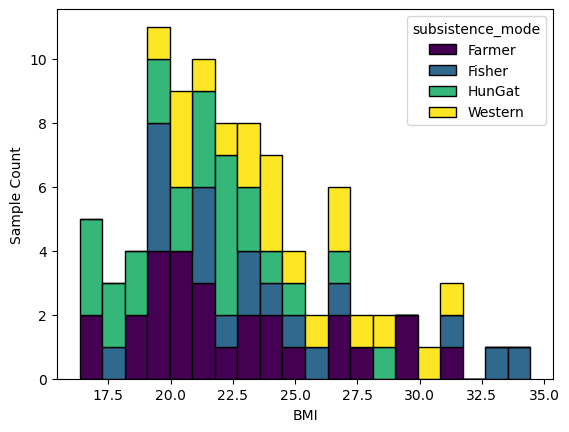

In [28]:
bmi_wide = metadata_filtered.pivot(columns='subsistence_mode', values='bmi')

#Plot stacked histogram
bmi_wide.plot.hist(stacked=True, bins=20, edgecolor='black',
                  ylabel= 'Sample Count' , xlabel = 'BMI',
                  cmap = 'viridis')